In [2]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt

In [49]:
img = cv2.imread('drone.2.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

In [ ]:
fig = plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(img)
plt.show()

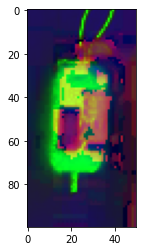

In [50]:
plt.imshow(hsv[150:250,500:550])

In [51]:
hsv[150+40,500+20]

array([179, 245,  49], dtype=uint8)

In [116]:
lower_red = np.array([0,80,10])
upper_red = np.array([5,255,255])
low_hue_mask = cv2.inRange(hsv, lower_red, upper_red)

# Range for upper range
lower_red = np.array([170,80,10])
upper_red = np.array([180,255,255])
high_hue_mask = cv2.inRange(hsv, lower_red, upper_red)

# Generating the final mask to detect red color
mask = low_hue_mask + high_hue_mask

In [117]:
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))
mask = cv2.morphologyEx(mask, cv2.MORPH_DILATE, np.ones((15,15), np.uint8))

# Segmenting the cloth out of the frame using bitwise and with the inverted mask
clipped_image_black = cv2.bitwise_and(img, img, mask=mask)

In [118]:
clipped_image_white = clipped_image_black.copy()
clipped_image_white[np.any(clipped_image_white != [0, 0, 0], axis=-1)] = 255
clipped_image_white[np.any(clipped_image_white == [0, 0, 0], axis=-1)] = 0

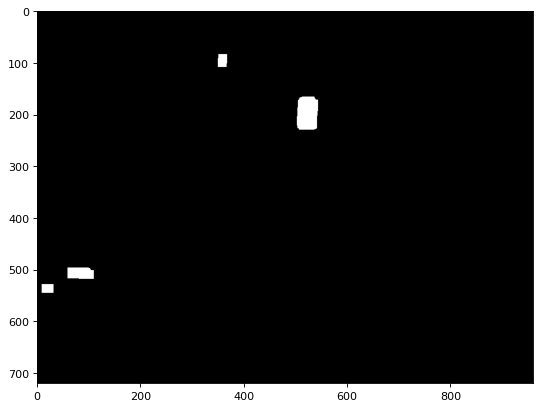

In [119]:
fig = plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(clipped_image_white)

In [120]:
contours = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]

In [121]:
red_area = max(contours, key=cv2.contourArea)
xg, yg, wg, hg = cv2.boundingRect(red_area)
rectangle = cv2.rectangle(img, (xg, yg), (xg+wg, yg+hg), (0, 255, 0), 2)

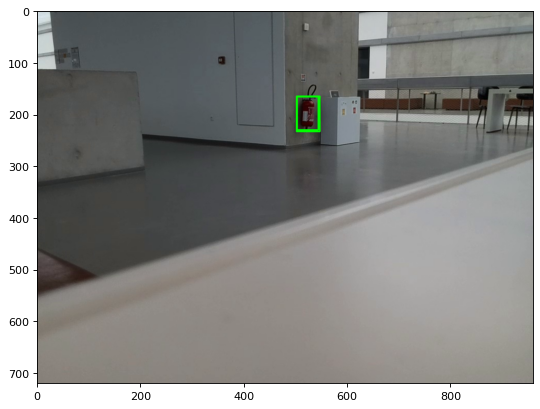

In [124]:
fig = plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(img)
plt.show()